### 1 - Import de Bibliotecas

In [24]:
import pandas as pd
import numpy as np
import random as rnd
from scipy import stats

# Visualizacao
import seaborn as sns 
import matplotlib.pyplot as plt
from itables import show

# Exibir plot inline
%matplotlib inline 

# ML
from sklearn.linear_model import LogisticRegression # Classificação binária e multiclasse - Modelo linear que usa uma função logística para modelar a probabilidade de uma classe.
from sklearn.svm import SVC, LinearSVC # (Support Vector Classifier) Classificação binária e multiclasse - Modelo de margem máxima que separa as classes com um hiperplano, maximizando a margem entre as classes.
from sklearn.ensemble import RandomForestClassifier # Classificação binária e multiclasse - Modelo de conjunto que treina múltiplas árvores de decisão em subconjuntos aleatórios dos dados e combina suas previsões.
from sklearn.neighbors import KNeighborsClassifier # Classificação binária e multiclasse - Algoritmo baseado em instâncias que classifica um ponto de dados com base na maioria das classes de seus K vizinhos mais próximos.
from sklearn.naive_bayes import GaussianNB # Classificação binária e multiclasse - Modelo probabilístico que aplica o teorema de Bayes com a suposição de independência entre os atributos.
from sklearn.linear_model import Perceptron # Classificação binária - Modelo linear de uma única camada de neurônios que pode resolver problemas linearmente separáveis.
from sklearn.linear_model import SGDClassifier # Classificação binária e multiclasse - Utiliza o método do gradiente descendente estocástico para otimizar modelos lineares, incluindo regressão logística e máquinas de vetor de suporte linear.
from sklearn.tree import DecisionTreeClassifier # Classificação binária e multiclasse -Modelo baseado em árvore que faz previsões ao dividir os dados em subconjuntos homogêneos usando regras de decisão baseadas em atributos.
from sklearn.preprocessing import LabelEncoder # Pré-processamento de dados - Converte rótulos de classe categóricos em números inteiros.

# Classificador
from catboost import Pool, CatBoostClassifier

### 2 - Import de Dados

- PassengerId: Id único por passageiro. Formato: gggg_pp, gggg indica o grupo do passageiro e pp é o número do passageiro no grupo. 
Pessoas de um grupo são normalmente da mesma família, mas nem sempre.

- CryoSleep: Indica se o passageiro optou por ser colocado em animação suspensa durante a viagem. 
Passageiros em criossono estão confinados às suas cabines.

- Cabin: nmr da cabine do passageiro. Formato: deck/num/side, side pode ser P para Porto (Port) ou S para Estibordo (Starboard).
- HomePlanet: O planeta de onde o passageiro partiu, normalmente o planeta de residência permanente.
- Destination: O planeta destino do passageiro.
- Age: Idade do passageiro.
- VIP: Indica se o passageiro é VIP.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck**: Quantia que o passageiro gastou em cada uma das muitas comodidades de luxo do Titanic Espacial.
- Name: Primeiro e ultimo nome do passageiro.
- Transported: Indica se o passageiro foi transportado para outra dimensão.

In [25]:
# translate = {'PassengerId':'ID','HomePlanet':'Planeta_origem','CryoSleep':'Criosono','Cabin':'Cabine','Destination':'Destino','Age':'Idade','VIP':'VIP', 
#              'Spa':'Spa', 'VRDeck':'VRDeck','RoomService':'Servico_quarto','FoodCourt':'Comida','ShoppingMall':'Shop','Name':'Nome','Transported':'Transportado'}

train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

### 3 - Desenvolvimento

#### 3.1 - Análise e Padronizacao de Dados

In [26]:
print(train_df.columns.values)


['PassengerId' 'HomePlanet' 'CryoSleep' 'Cabin' 'Destination' 'Age' 'VIP'
 'RoomService' 'FoodCourt' 'ShoppingMall' 'Spa' 'VRDeck' 'Name'
 'Transported']


In [27]:
train_df.dtypes


PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [28]:
train_df.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [29]:
# Info Geral
train_df.info()
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  

In [30]:
# Resumo Estatistico (numerico)
train_df.describe()
# test_df.describe()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [31]:
# Resumo Estatistico (categorico)
train_df.describe(include=['O'])
# test_df.describe(include=['O'])


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name
count,8693,8492,8476,8494,8511,8490,8493
unique,8693,3,2,6560,3,2,8473
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,False,Gollux Reedall
freq,1,4602,5439,8,5915,8291,2


In [32]:
# Contagem de NaN
train_df.isnull().sum()
# test_df.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [33]:
# Fillna atribuindo a Moda nos valores nulos
colunas = ['HomePlanet','Age','CryoSleep','Destination','VIP','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']

for dataset in combine:
    for coluna in colunas:
        try: dataset[coluna].fillna(dataset[coluna].mode()[0],inplace = True)
        except: pass

In [34]:
# Contagem de NaN após fillna
train_df.isnull().sum()
# test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age               0
VIP               0
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
dtype: int64

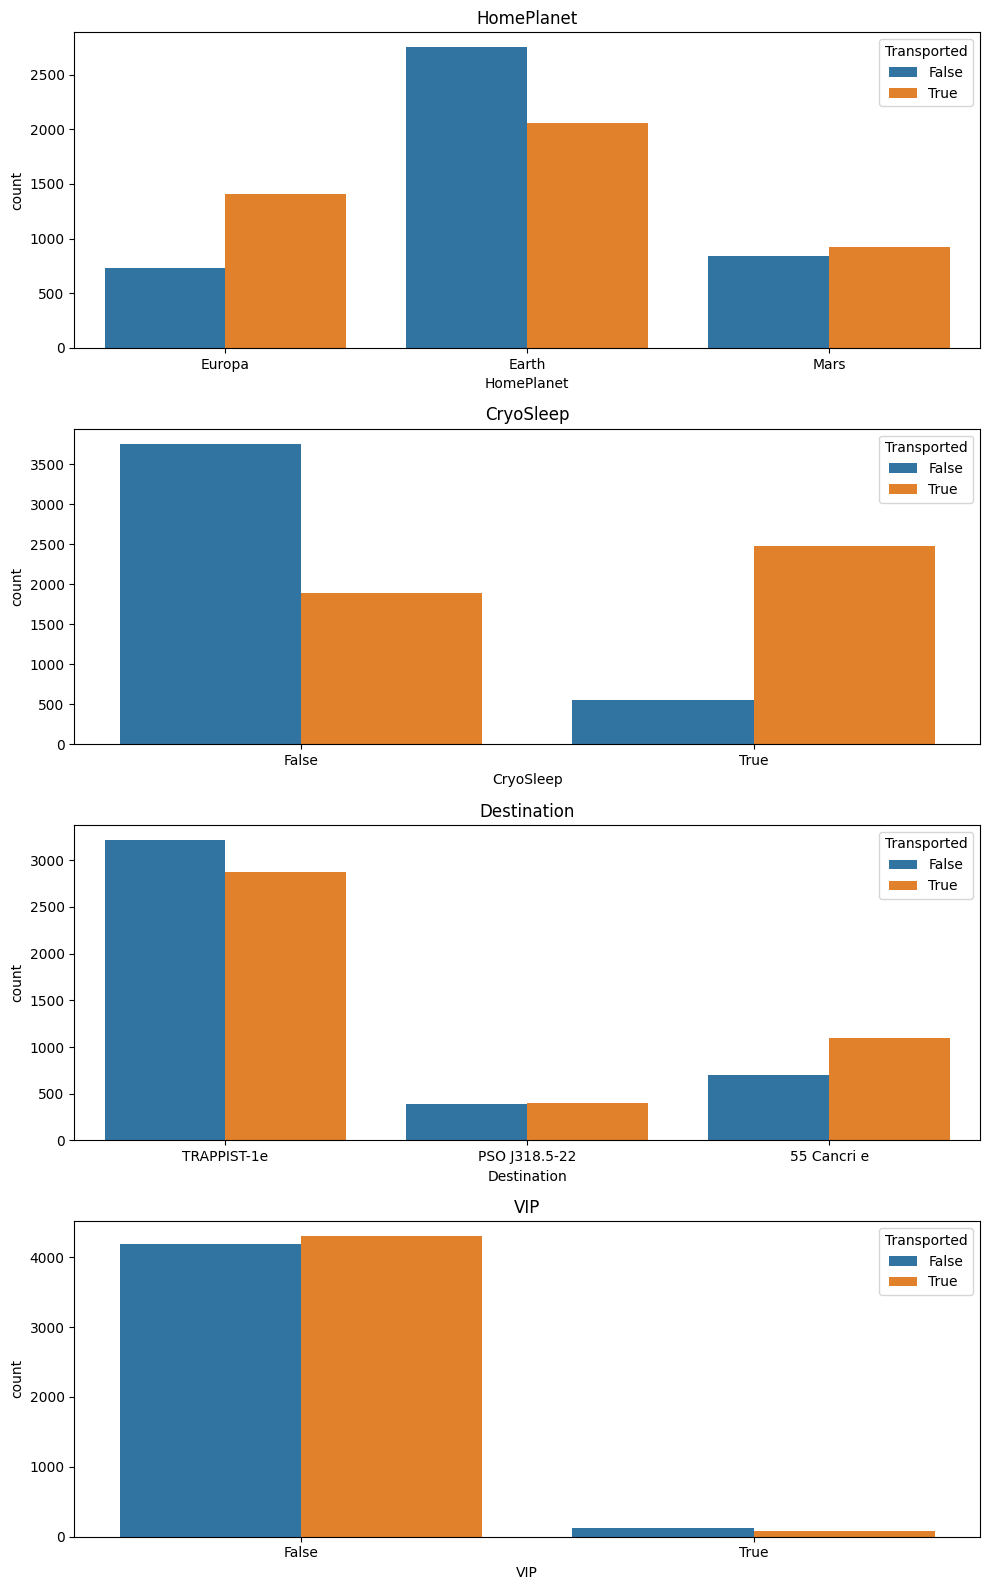

In [35]:
# Variaveis Categoricas
var_cat = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

# Plot
fig = plt.figure(figsize=(10,16))

for i, var in enumerate(var_cat):
    ax = fig.add_subplot(4,1,i+1)
    sns.countplot(data = train_df, x = var, axes = ax, hue = 'Transported')
    ax.set_title(var)
fig.tight_layout() 

plt.show()

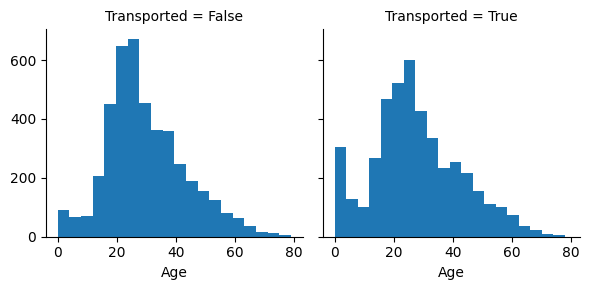

In [36]:
# Distribuicao de Transportados por idade
sns.FacetGrid(train_df, col='Transported').map(plt.hist, 'Age', bins=20)

In [37]:
# Agrupamento da Idade
for dataset in combine:
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBin
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(31.6, 47.4]"
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(15.8, 31.6]"
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(47.4, 63.2]"
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(31.6, 47.4]"
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(15.8, 31.6]"


In [38]:
# Split de Deck, Num e Side
for dataset in combine:
    dataset['Cabin'].fillna('Z/9999/Z', inplace=True)

    dataset['deck'] = dataset['Cabin'].apply(lambda x:str(x)[:1])
    dataset['deck'].fillna(dataset['deck'].mode()[0],inplace=True)

    dataset['num'] = (dataset['Cabin'].apply(lambda x:x.split('/')[1]).astype(int))
    dataset['num'].fillna(dataset['num'].mode()[0],inplace=True)
    
    dataset['side'] = dataset['Cabin'].apply(lambda x:str(x)[-1:])
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,AgeBin,deck,num,side
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,"(31.6, 47.4]",B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,"(15.8, 31.6]",F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,"(47.4, 63.2]",A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,"(31.6, 47.4]",A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,"(15.8, 31.6]",F,1,S


In [39]:
# Visão Macro de Transportados por Variável

# Distribuição de Transportados por planeta_origem
train_df[['HomePlanet', 'Transported']].groupby(['HomePlanet'], as_index=False).mean().sort_values(by='Transported', ascending=False)

# Distribuição de Transportados por Planeta_Destino
train_df[["Destination", "Transported"]].groupby(['Destination'], as_index=False).mean().sort_values(by='Transported', ascending=False)

# Distribuição de Transportados por VIP
train_df[["VIP", "Transported"]].groupby(['VIP'], as_index=False).mean().sort_values(by='Transported', ascending=False)

# Distribuição de Transportados por Criosono
train_df[["CryoSleep", "Transported"]].groupby(['CryoSleep'], as_index=False).mean().sort_values(by='Transported', ascending=False)

# Distribuição de Transportados por Grupo de Idade
train_df[['AgeBin','Transported']].groupby(['AgeBin'],as_index=False).mean().sort_values(by='Transported',ascending=False)

# Distribuicao de transportados por deck
train_df[['deck','Transported']].groupby(['deck'],as_index=False).mean().sort_values(by='Transported',ascending=False)

,deck,Transported
1,B,0.734275
2,C,0.680054
6,G,0.516217
8,Z,0.502513
0,A,0.496094
5,F,0.439871
3,D,0.433054
4,E,0.357306
7,T,0.200000


In [40]:
# Converter Var Categoricas em Binaria (True or False)
for coluna in ['HomePlanet','Destination','CryoSleep']:
    train_df = pd.get_dummies(train_df, columns = [coluna])
    test_df = pd.get_dummies(test_df,columns = [coluna])

combine = [train_df,test_df]
train_df.head()


,PassengerId,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,...,num,side,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,CryoSleep_False,CryoSleep_True
0,0001_01,B/0/P,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,...,0,P,False,True,False,False,False,True,True,False
1,0002_01,F/0/S,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,...,0,S,True,False,False,False,False,True,True,False
2,0003_01,A/0/S,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,...,0,S,False,True,False,False,False,True,True,False
3,0003_02,A/0/S,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,...,0,S,False,True,False,False,False,True,True,False
4,0004_01,F/1/S,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,...,1,S,True,False,False,False,False,True,True,False


In [41]:
# Conversã de Variaveis
for dataset in combine:
    # Converte variavel booleana em Binaria
    le = LabelEncoder()
    dataset['VIP'] = le.fit_transform(dataset['VIP'])

    # Converte Grupo_Idade em Categorias (1 - 4)
    dataset.loc[ dataset['Age'] <= 15, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 15) & (dataset['Age'] <= 31), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 31) & (dataset['Age'] <= 47), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 47) & (dataset['Age'] <= 63), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 63), 'Age'] = 4
    dataset['Age'] = dataset['Age'].astype(int)

    # Agrupa num em regioes (categoricas)
    dataset['region1']=(dataset['num']<300).astype(int)  
    dataset['region2']=((dataset['num']>=300)& (dataset['num']<600)).astype(int)  
    dataset['region3']=((dataset['num']>=600)& (dataset['num']<900)).astype(int)  
    dataset['region4']=((dataset['num']>=900)& (dataset['num']<1200)).astype(int)  
    dataset['region5']=((dataset['num']>=1200)& (dataset['num']<1500)).astype(int)  
    dataset['region6']=((dataset['num']>=1500)& (dataset['num']<1800)).astype(int)  
    dataset['region7']=(dataset['num']>1800).astype(int)  

    # Extrai a informação de grupo do id do passageiro
    dataset['group'] = dataset.PassengerId.apply(lambda x:x.split('_')[0])
    dataset['group'] = dataset['group'].astype(int)

    # Soma dos Gastos na viagem
    dataset['sum'] = dataset['VRDeck'] + dataset['Spa'] + dataset['ShoppingMall'] + dataset['RoomService'] + dataset['FoodCourt']
    
    # Percentual de gastos por Dispesa
    dataset['vr'] = dataset['VRDeck'] / dataset['sum']
    dataset['spa'] = dataset['Spa'] / dataset['sum']
    dataset['room'] = dataset['RoomService'] / dataset['sum']
    dataset['shop'] = dataset['ShoppingMall'] / dataset['sum']
    dataset['food'] = dataset['FoodCourt'] / dataset['sum']
    dataset['vr'].fillna(0,inplace = True)
    dataset['spa'].fillna(0,inplace = True)
    dataset['room'].fillna(0,inplace = True)
    dataset['shop'].fillna(0,inplace = True)
    dataset['food'].fillna(0,inplace = True)

show(train_df.head())

Text(0.5, 1.0, 'Age')

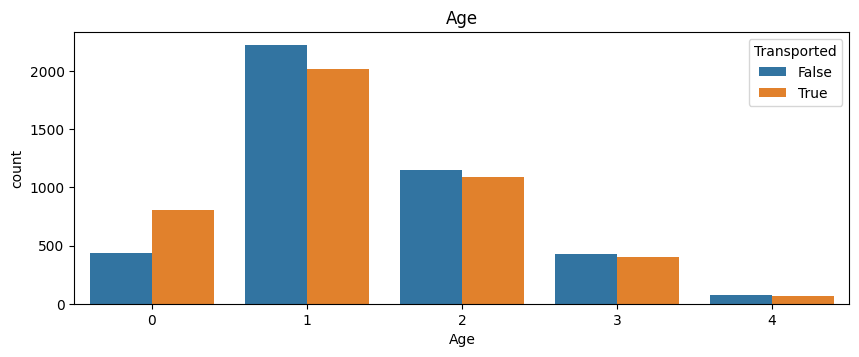

In [42]:
# Distribuicao de transportados por categorias de idade
fig=plt.figure(figsize=(10,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='Age', hue='Transported', order=[0,1,2,3,4])
plt.title('Age')

Text(0.5, 1.0, 'Cabin deck')

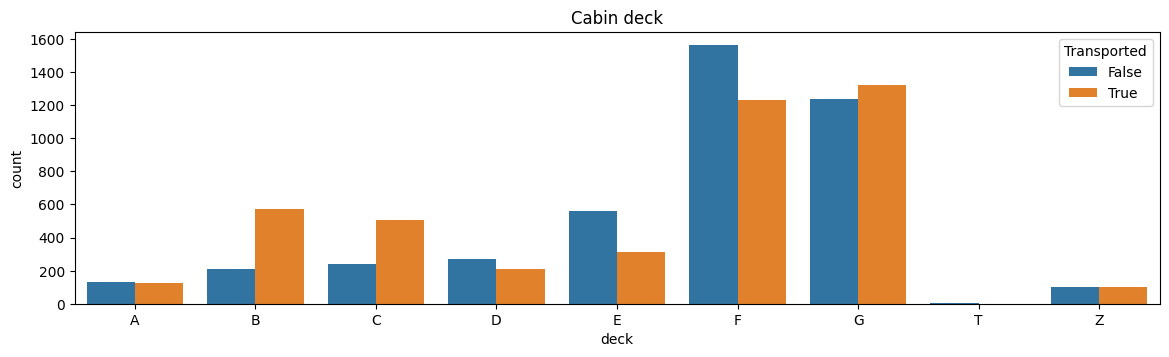

In [43]:
# Distribuicao de transportados por categorias de deck
fig=plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
sns.countplot(data=train_df, x='deck', hue='Transported', order=['A','B','C','D','E','F','G','T','Z'])
plt.title('Cabin deck')

(0.0, 2000.0)

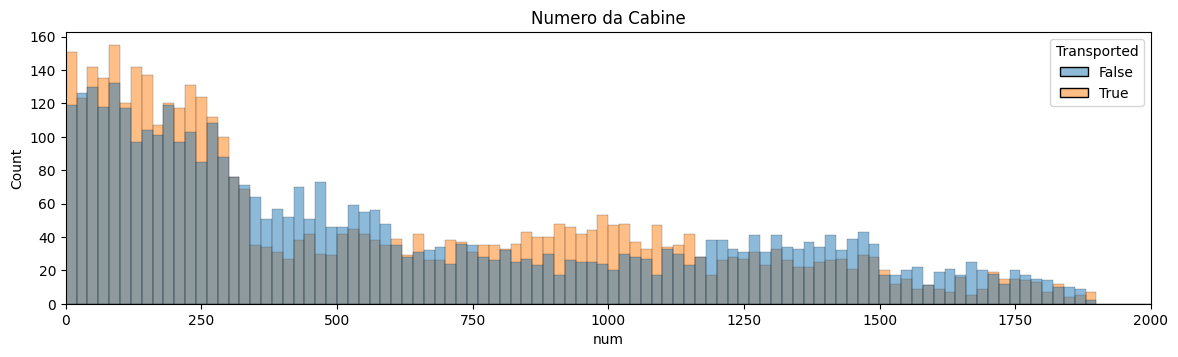

In [44]:
# Distribuicao de transportados por categorias de Cabine
plt.figure(figsize=(14, 12)) 
plt.subplot(3,1,2)
sns.histplot(data=train_df, x='num', hue='Transported',binwidth=20)
plt.title('Numero da Cabine')
plt.xlim([0,2000])

In [45]:
# Distribuicao de transportados por categorias de deck
deck_mapping = {"B": 1, "C": 1, "G": 2,"Z": 2, "A": 2, "F": 3, "D": 3, "E": 4, "T": 5}
side_map = {'P':1,'S':0}

for dataset in combine:
    dataset['deck'] = dataset['deck'].map(deck_mapping)
    dataset['side'] = dataset['side'].map(side_map)
    dataset['side'].fillna(dataset['side'].mode()[0],inplace=True)

show(train_df.head())

In [46]:
# Sem Variaveis nulas (Exceto Nome)
train_df.isnull().sum()

PassengerId                    0
Cabin                          0
Age                            0
VIP                            0
RoomService                    0
FoodCourt                      0
ShoppingMall                   0
Spa                            0
VRDeck                         0
Name                         200
Transported                    0
AgeBin                         0
deck                           0
num                            0
side                           0
HomePlanet_Earth               0
HomePlanet_Europa              0
HomePlanet_Mars                0
Destination_55 Cancri e        0
Destination_PSO J318.5-22      0
Destination_TRAPPIST-1e        0
CryoSleep_False                0
CryoSleep_True                 0
region1                        0
region2                        0
region3                        0
region4                        0
region5                        0
region6                        0
region7                        0
group     

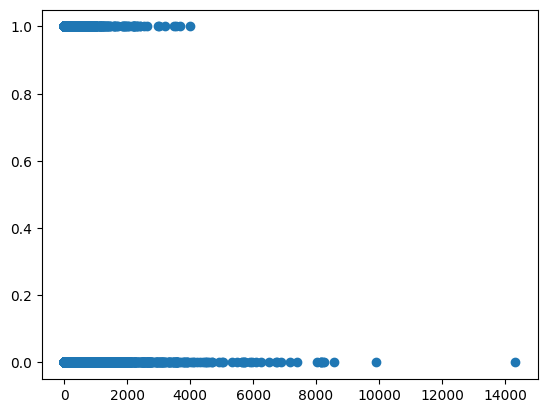

In [56]:
# plt.scatter(x=train_df['ShoppingMall'],y=train_df['Transported'])
# plt.scatter(x=train_df['FoodCourt'],y=train_df['Transported'])
# plt.scatter(x=train_df['Spa'],y=train_df['Transported'])
# plt.scatter(x=train_df['VRDeck'],y=train_df['Transported'])
plt.scatter(x=train_df['RoomService'],y=train_df['Transported'])


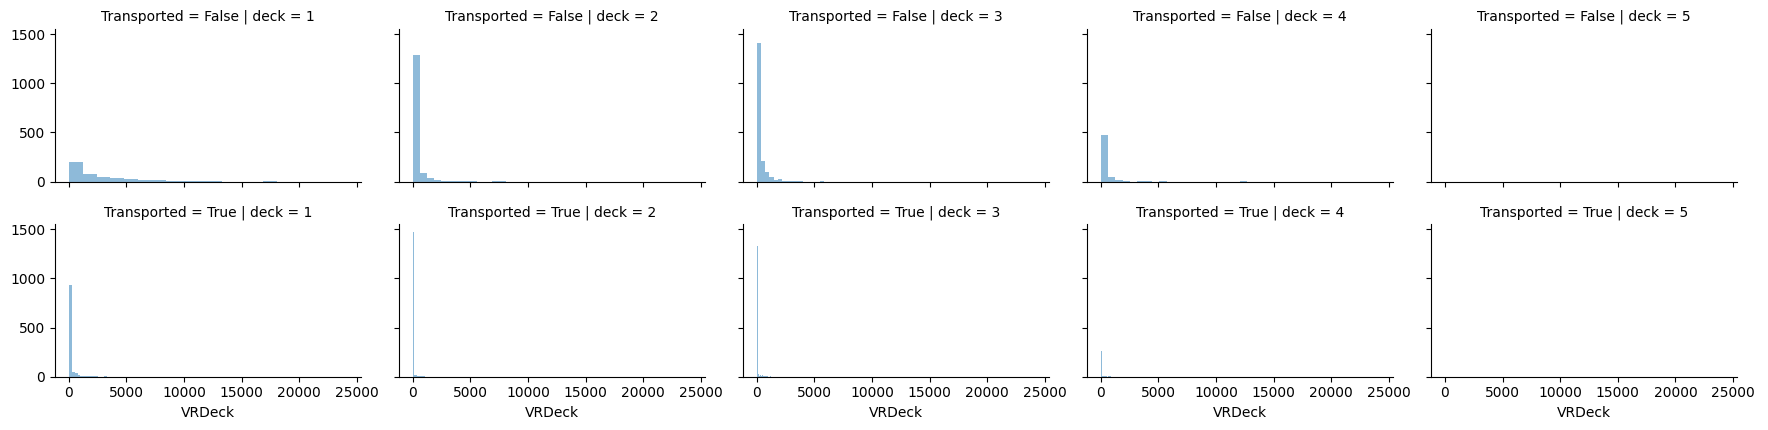

In [49]:
# Distribuição de VRDeck para cada combinação unica de Transportados e deck
grid = sns.FacetGrid(train_df, row='Transported', col='deck', height=2.2, aspect=1.6)
grid.map(plt.hist, 'VRDeck', alpha=.5, bins=20)
grid.add_legend()

In [50]:
# Preprocessamento
train_df = train_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId','AgeBin','Cabin','num'], axis=1)
combine = [train_df, test_df]

train_df.shape, test_df.shape

((8693, 32), (4277, 31))

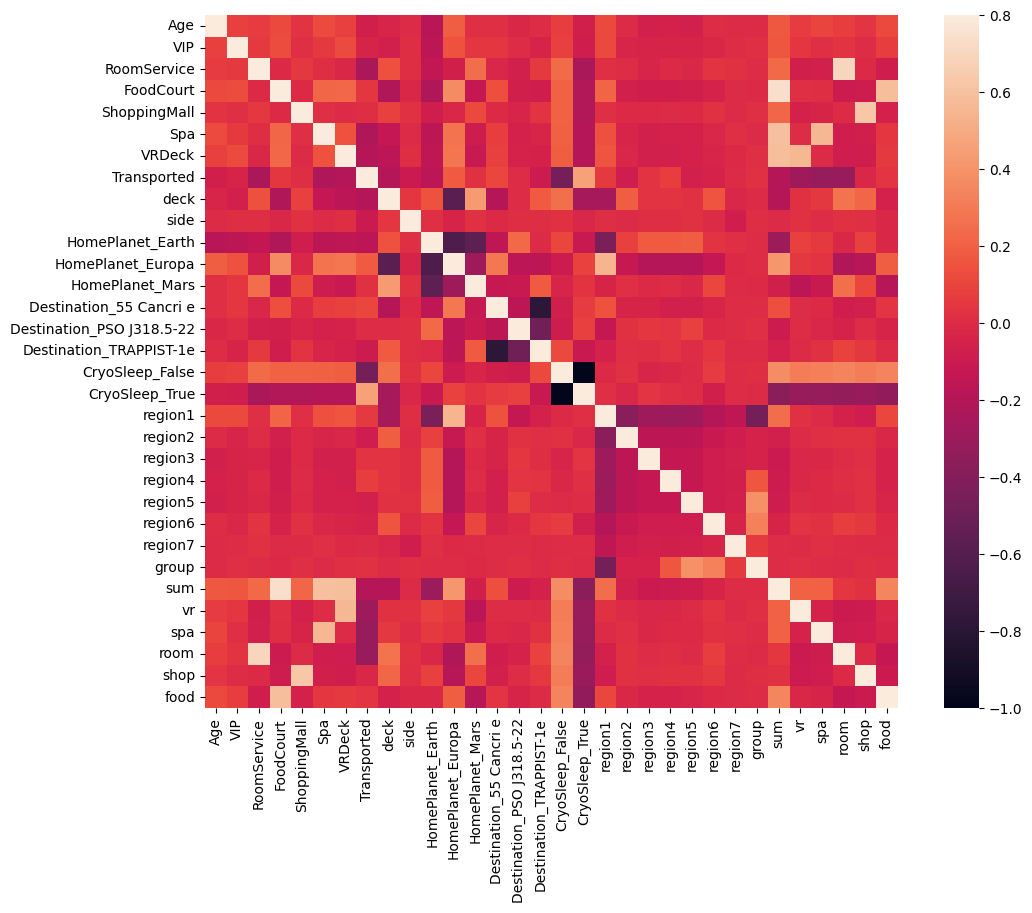

In [51]:
# Mapa de Calor de relacao das Variaveis
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### 3.2 - Treinamento e exploração de Modelos

In [59]:
# Divisãoi de Grupos de treino e teste
X_train = train_df.drop("Transported", axis=1)
Y_train = train_df["Transported"]
X_test  = test_df.copy()
# X_train.shape, Y_train.shape, X_test.shape


In [60]:

# Regressao logica
# regressao = LogisticRegression(max_iter=1000)
regressao = LogisticRegression()
regressao = regressao.fit(X_train, Y_train) # Treina o modelo de regressao
Y_pred = regressao.predict(X_test) # Predicao do modelo
acc_log = round(regressao.score(X_train, Y_train) * 100, 2) # Acuracia aproximada
acc_log

# Podemos usar a regressão logística para validar nossas suposições e decisões para a criação de recursos e conclusão de metas. Isso pode ser feito calculando o coeficiente dos recursos na função de decisão.
# Os coeficientes positivos aumentam as probabilidades logarítmicas da resposta (e, portanto, aumentam a probabilidade).
# Os coeficientes negativos diminuem as probabilidades logarítmicas da resposta (e, portanto, diminuem a probabilidade).
# algoritmo atingiu o número máximo permitido de iterações durante o processo de otimização dos parâmetros do modelo.



c:\Users\lucas\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


79.08

In [61]:
# Coeficiente de Correlacao das variaveis
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(regressao.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
16,CryoSleep_True,0.565037
10,HomePlanet_Europa,0.422772
17,region1,0.354449
12,Destination_55 Cancri e,0.232314
0,VIP,0.202155
11,HomePlanet_Mars,0.145908
20,region4,0.093692
19,region3,0.047827
1,RoomService,0.004930
3,ShoppingMall,0.001237


In [62]:
# Support Vector Machines (SVM)
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

78.65

In [63]:
#  k-Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

85.09

In [64]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

77.1

In [65]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

53.4

In [66]:
# Linear SVC (online)
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

79.52

In [67]:
# Stochastic Gradient Descent (online)
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

78.66

In [68]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

# Este modelo usa uma árvore de decisão como modelo preditivo que mapeia características (galhos de árvores) para conclusões sobre o valor alvo (folhas de árvores). 
# Os modelos de árvore em que a variável alvo pode assumir um conjunto finito de valores são chamados de árvores de classificação; 
# nessas estruturas de árvore, as folhas representam rótulos de classe e os ramos representam conjunções de recursos que levam a esses rótulos de classe. 
# As árvores de decisão onde a variável alvo pode assumir valores contínuos (normalmente números reais) são chamadas de árvores de regressão.


99.45

In [69]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

# Florestas aleatórias ou florestas de decisão aleatória são um método de aprendizagem conjunto para classificação, regressão e outras tarefas, 
# que operam construindo uma infinidade de árvores de decisão (n_estimadores=100) no momento do treinamento e gerando a classe 
# que é o modo das classes (classificação) ou previsão média (regressão) das árvores individuais

99.45

In [70]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,99.45
8,Decision Tree,99.45
1,KNN,85.09
7,Linear SVC,79.52
2,Logistic Regression,79.08
6,Stochastic Gradient Decent,78.66
0,Support Vector Machines,78.65
4,Naive Bayes,77.10
5,Perceptron,53.40


### 4 - Resultado

In [72]:
# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=100,
                           learning_rate=0.15,
                           depth=4,
                           cat_features = [0],
                           loss_function='MultiClass')
# Fit model
model.fit(X_train, Y_train)

# Get predicted classes
preds_class = model.predict(X_test)

preds_class_T = preds_class.T
preds_class_T[0,:]


0:	learn: 0.6411576	total: 179ms	remaining: 17.7s
1:	learn: 0.6058105	total: 201ms	remaining: 9.87s
2:	learn: 0.5792737	total: 241ms	remaining: 7.79s
3:	learn: 0.5548066	total: 261ms	remaining: 6.27s
4:	learn: 0.5373781	total: 278ms	remaining: 5.29s
5:	learn: 0.5232981	total: 295ms	remaining: 4.62s
6:	learn: 0.5090793	total: 341ms	remaining: 4.53s
7:	learn: 0.4992203	total: 360ms	remaining: 4.14s
8:	learn: 0.4902185	total: 379ms	remaining: 3.83s
9:	learn: 0.4844999	total: 399ms	remaining: 3.59s
10:	learn: 0.4784282	total: 424ms	remaining: 3.43s
11:	learn: 0.4729796	total: 442ms	remaining: 3.24s
12:	learn: 0.4682869	total: 462ms	remaining: 3.09s
13:	learn: 0.4623588	total: 505ms	remaining: 3.1s
14:	learn: 0.4582007	total: 529ms	remaining: 3s
15:	learn: 0.4551230	total: 548ms	remaining: 2.88s
16:	learn: 0.4527166	total: 591ms	remaining: 2.88s
17:	learn: 0.4499290	total: 611ms	remaining: 2.79s
18:	learn: 0.4467673	total: 635ms	remaining: 2.71s
19:	learn: 0.4447345	total: 655ms	remaining: 

array([ True, False,  True, ...,  True,  True,  True])

In [73]:
submission_df = pd.read_csv('sample_submission.csv')

submission = pd.DataFrame({
        "PassengerId": submission_df["PassengerId"],
        "Transported": preds_class_T[0,:]
    })
submission#.to_csv('submission.csv', index=False)

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,True
4274,9271_01,True
4275,9273_01,True
